In [46]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

np.set_printoptions(precision = 3)

In [36]:
def plot_matrix(matrix_seq, xAx, labels):
    true_neg = list(mat[0][0] for mat in matrix_seq)
    false_neg = list(mat[1][0] for mat in matrix_seq)
    false_pos = list(mat[0][1] for mat in matrix_seq)
    true_pos = list(mat[1][1] for mat in matrix_seq)
    #xAx = list(range(len(matrix_seq)))
    plt.plot(xAx, true_neg, color = 'red', label = 'TN')
    plt.plot(xAx, false_neg, color = 'blue', label = 'FN')
    plt.plot(xAx, true_pos, color = 'green', label = 'TP')
    plt.plot(xAx, false_pos, color = 'black', label = 'FP')
    plt.legend(loc='best')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.grid(linewidth=1)
    plt.show()
    return 


def plot_scores(scores, param, labels):
    plt.plot(param, scores)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.grid(linewidth=1)
    plt.show()
    return

def plot_metrics(metrics, xAx, labels):
    marks = ['o','v','x','D']
    i = 0
    for key in metrics:
        plt.plot(xAx, metrics[key], label = key, marker = marks[i])
        i += 1
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.grid(linewidth = 1)
    plt.legend(loc='best')
    plt.show()
    return

def full_plot(mat, par, mat_lab):
        
#     plt.figure(figsize=(10,10))
#     plt.subplot(2,1,1)
#     plt.title("Confusion matrix")
#     plot_matrix(mat, par, mat_lab)
    
#     plt.figure(figsize = (10,10))
#     plt.subplot(2,1,1)
    
    plt.figure(figsize = (10,10))
    plt.subplot(2,1,1)
    plt.title("Positive metrics")
    metrics = get_metrics(mat, 'positive')
    best_scores = get_best_scores(metrics)
    best_scores['Parameter'] = par[best_scores['Parameter']]
    plot_metrics(metrics, par, mat_lab)
    
    print_scores(best_scores)
    
#     plt.figure(figsize = (10,10))
#     plt.subplot(2,1,2)
#     plt.title("Negative metrics")
#     metrics = get_metrics(mat, 'negative')
#     best_scores = get_best_scores(metrics)
#     best_scores['Parameter'] = par[best_scores['Parameter']]
#     plot_metrics(metrics, par, mat_lab)
    
#     print_scores(best_scores)
    return best_scores
    
def print_scores(scor):
    for key in scor:
        print(key, '\t\t-\t', "%.4f" % (scor[key]))
    return
    
def get_metrics(matrix_seq, cl):
    true_neg = np.asarray(list(mat[0][0] for mat in matrix_seq))
    false_neg = np.asarray(list(mat[1][0] for mat in matrix_seq))
    false_pos = np.asarray(list(mat[0][1] for mat in matrix_seq))
    true_pos = np.asarray(list(mat[1][1] for mat in matrix_seq))
    
    if cl == 'positive':
        accuracy = 100*(true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
        precision = 100*true_pos/np.add(true_pos, false_pos)
        recall = 100*true_pos/(true_pos + false_neg)
        FM = ((true_pos/(true_pos + false_pos))*(true_pos/(true_pos+false_neg)))**(1/2)
        F1score = 2*precision*recall/(precision+recall)
    elif cl == 'negative':
        accuracy = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
        precision = true_neg/np.add(true_neg, false_neg)
        recall = true_neg/(true_neg + false_pos)
        FM = ((true_pos/(true_pos + false_pos))*(true_pos/(true_pos+false_neg)))**(1/2)
        F1score = 2*precision*recall/(precision+recall)
        
    metr = dict()
    metr['Recall'] = recall
    metr['Precision'] = precision
    metr['F1 score'] = F1score
#     metr['Folwkes-Mallows'] = FM
    metr['Accuracy'] = accuracy
    return metr

def get_best_scores(metr):
    best_sc = dict()
    max_ind = np.argmax(metr['F1 score'])
    for key in metr:
        best_sc[key] = metr[key][max_ind]
    best_sc["Parameter"] = max_ind
    return best_sc

In [48]:
df = pd.read_csv('peak_data_mining.csv')

In [49]:
df.head()

,name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Target
0,marina1_0_Con,-4.967338e-13,0.015955,0.088209,0.228236,0.310381,0.150325,-0.191066,-0.441515,-0.422158,-0.111689,0.377975,0.818441,1.000000,0.884499,0.594843,0
1,marina1_1_Con,1.595489e-02,0.088209,0.228236,0.310381,0.150325,-0.191066,-0.441515,-0.422158,-0.111689,0.377975,0.818441,1.000000,0.884499,0.594843,0.300374,0
2,marina1_2_Con,8.820920e-02,0.228236,0.310381,0.150325,-0.191066,-0.441515,-0.422158,-0.111689,0.377975,0.818441,1.000000,0.884499,0.594843,0.300374,0.101979,1
3,marina1_3_Con,2.282362e-01,0.310381,0.150325,-0.191066,-0.441515,-0.422158,-0.111689,0.377975,0.818441,1.000000,0.884499,0.594843,0.300374,0.101979,-0.002891,1
4,marina1_4_Con,3.103807e-01,0.150325,-0.191066,-0.441515,-0.422158,-0.111689,0.377975,0.818441,1.000000,0.884499,0.594843,0.300374,0.101979,-0.002891,0.001980,0


In [50]:
keys = df.columns.values
keys = keys[1:-1]
print(keys)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14']


In [51]:
nulls = df[df['Target']==0].count()
nulls = nulls['name']
ones = df[df['Target']==1].count()
ones = ones['name']

lenDiff = abs(nulls-ones)
halfLength = int(ones/2)
print(halfLength)

df_null = df[df['Target']==0].iloc[lenDiff:]
df_ed = df[df['Target']==1]
df_train = pd.concat([df_null.head(halfLength), df_ed.head(halfLength)], ignore_index = True)
df_ver = pd.concat([df_null.tail(halfLength), df_ed.tail(halfLength)], ignore_index = True)

df_train.sample(frac=1).reset_index(drop=True)
df_ver.sample(frac=1).reset_index(drop=True)

6023


,name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Target
0,tereshkov2_996_Con,-0.587201,-0.842709,-1.039638,-1.053829,-0.806694,-0.280624,0.360054,0.845047,1.000000,0.845897,0.549035,0.344634,0.381917,0.620455,0.922990,1
1,tarasov1_726_Vid,-0.334016,-0.308325,-0.228443,-0.120474,-0.008957,0.110401,0.269093,0.482106,0.717747,0.909045,1.000000,0.978505,0.858395,0.661692,0.425128,1
2,Omel_2_605_Con,1.000000,1.053456,1.198198,1.239571,1.123765,1.030148,1.282915,2.037593,3.061053,3.894451,4.211744,4.034207,3.663429,3.269763,2.590927,0
3,Eremin_2_852_Vid,1.000000,0.987393,0.742865,0.325610,-0.210296,-0.799267,-1.352001,-1.776262,-2.022797,-2.093330,-2.030672,-1.914461,-1.811406,-1.718029,-1.585724,0
4,Omel_2_382_Vid,-0.976956,-0.904252,-0.832018,-0.786651,-0.752763,-0.684550,-0.545916,-0.336524,-0.068605,0.229973,0.508948,0.734365,0.901189,1.000000,0.995551,1
5,Omel_2_349_Con,-15.502900,-13.356757,-11.579445,-9.915854,-8.088034,-5.871909,-3.211543,-0.598262,1.000000,0.938770,-0.608305,-2.734757,-4.251293,-4.488482,-3.882734,0
6,Eremin_2_771_Vid,1.000000,0.806462,0.597062,0.327887,-0.014836,-0.397677,-0.737257,-0.944927,-0.987695,-0.917572,-0.810176,-0.692580,-0.602949,-0.606434,-0.703830,1
7,semchuk5_prised_857_Vid,-0.693834,-1.453994,-1.769803,-1.717877,-1.761773,-2.364834,-3.409882,-4.270017,-4.408358,-3.836787,-3.004299,-2.251626,-1.507771,-0.470232,1.000000,0
8,semchuk5_prised_128_Con,-1.104537,-0.998791,-0.685420,-0.207769,0.310768,0.727011,0.962968,1.000000,0.858362,0.607823,0.355899,0.190432,0.138968,0.183902,0.292300,0
9,semchuk2_914_Con,0.840405,0.063585,-0.837527,-1.655353,-2.144351,-2.219339,-2.059543,-1.932341,-1.954565,-2.062613,-2.114889,-1.938059,-1.387471,-0.386072,1.000000,1


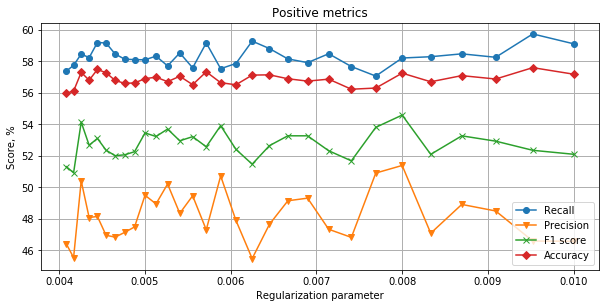

Recall 		-	 58.1907
Precision 		-	 51.3697
F1 score 		-	 54.5679
Accuracy 		-	 57.2306
Parameter 		-	 0.0080


In [52]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 5), activation = 'logistic')
    

scores = []
alphas = []
conf_mat = []
for i in range(200, 500, 10):
    a = 2/i
    clf.alpha = a
    clf.fit(df_train[features].values, df_train['Target'].values)
    scoreRes = clf.score(df_ver[features].values, df_ver['Target'].values)
    res_pred = clf.predict(df_ver[features].values)
    scores.append(scoreRes)
    conf_mat.append(confusion_matrix(res_pred, df_ver['Target'].values)/halfLength)
    alphas.append(a)
full_plot(conf_mat, alphas, ["Regularization parameter", 'Score, %'])
plt.show()